<a href="https://colab.research.google.com/github/Vaycold/pytorch_tutorial/blob/main/%2303.DATASET%20%26%20DATALOADER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DATASET & DATALOADER

    : 더 나은 가독성과 모듈성을 위해 데이터셋 코드를 모델 학습 코드로부터 분리하는 것이 이상적

### 데이터셋 불러오기

    TorchVision에서 Fashion MNIST 데이터셋을 불러오는 예제를 봄
    

In [3]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor() 
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor() 
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


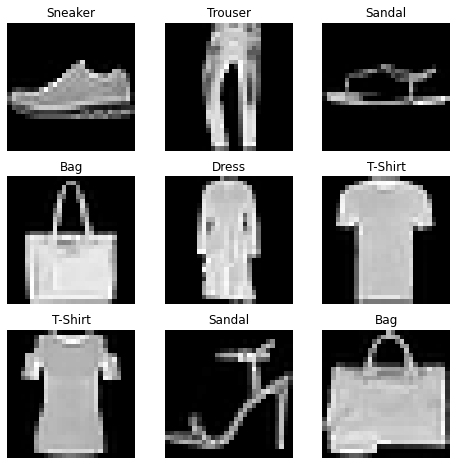

In [5]:
# 데이터셋 순회 및 시각화

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8,8))
cols, rows = 3,3
for i in range(1, cols*rows+1) :
    sample_idx = torch.randint(len(training_data), size =(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows,cols,i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

### 사용자 정의 데이터셋 만들기

    : 사용자 정의 Dataset 클래스는 반드시 3개의 함수를 구현해야함(__init__, __len__, __getitem__)


In [7]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset) :
    def __init__(self, annotations_file, img_dir, transform=None, target_transform = None) :
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self) :
        return len(self.img_labels)

    def __getitem__(self, idx) :
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx,0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx,1]
        if self.transform :
            image = self.transform(image)
        if self.target_transform :
            label = self.target_transform(label)
        return image, label

'''
[__init__] 
   : Dataset 객체가 생성될 때 한번만 실행,
   : 이미지와 주석파일이 포함된 디렉토리와 두가지 변형을 초기화 

[__len__]
   : 데이터셋의 샘플 개수를 반환

[__getitem__]
   : 주어진 인덱스에 해당하는 샘플을 데이터셋에서 불러오고 반환
   : 인덱스를 기반으로 디스크에서 이미지의 위치를 식별
   : read_image를 사용하여 이미지를 텐서로 변환하
   : self.img_labels의 csv데이터로부터 해당하는 정답을 가져옴
'''
pass

### DataLoader로 학습용 데이터 준비

    : Dataset - 데이터셋의 특징을 가져오고 하나의 샘플에 정답을 지정하는 일을 한꺼번에 함
              - 모델을 학습할 때 일반적으로 샘플들을 미니배치로 전달, 매 에폭마다 데이터를 다시 섞어서 과적합을 막음

    : DataLoader : 간단한 API로 이러한 복잡한 과정들을 추상화한 순회가능한 객체

In [8]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)

### DataLoader를 통해 순회하기

    :Dataloader에 데이터셋을 불러온 뒤에는 필요에 따라 데이터셋을 순회할 수 있음

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


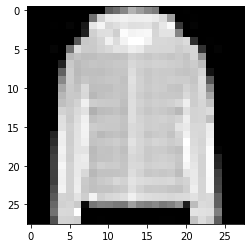

Label: 4


In [9]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")